In [11]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
import pickle

# Add source file paths
import os
path = os.path.abspath(os.getcwd())
os.chdir("..")
parent_path = os.path.abspath(os.getcwd())

import sys 
sys.path.insert(1, parent_path + '\\source')

from data_helper import pde_exact

$\nabla^2 u(x) = f(x)$ <br />
where $(x) \in (-1, 1)$ <br/>
with periodic boundary conditions

In [12]:
def rand_coeff():
    n = 5
    c_i = np.random.rand(n)
    c1 = c_i[0]; c2 = c_i[1]; c3 = c_i[2]; c4 = c_i[3]; c5 = c_i[4];
    return c1, c2, c3, c4, c5

exact = pde_exact()

In [24]:
np.random.seed(0)
N = 512
x = np.linspace(-1, 1, N);
num = 29
u_ls = []; f_ls = []; c_ls = []
for i in range(num):
    c1, c2, c3, c4, c5 = rand_coeff()
    u_vals, f_vals = exact.poisson_1d(c1, c2, c3, c4, c5, N)
    u_ls.append(u_vals); f_ls.append(f_vals); 
    c_ls.append(np.array([c1, c2, c3, c4, c5]))

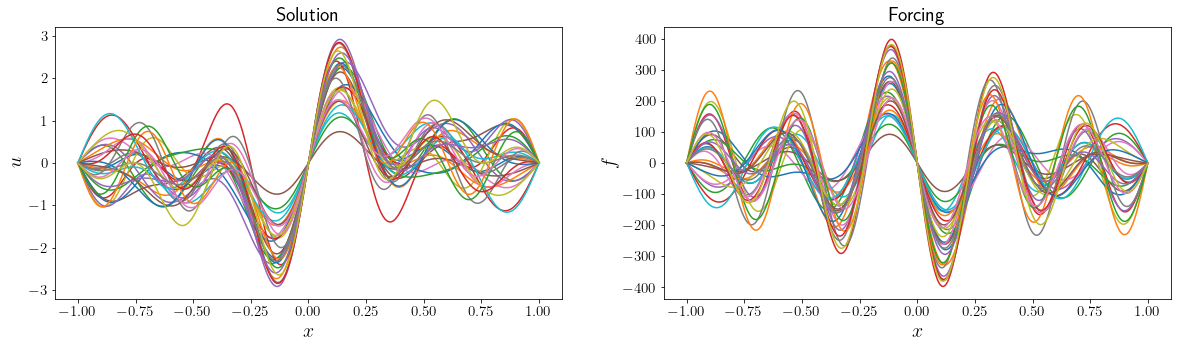

In [25]:
# Plot
plt.figure(figsize = (20,5))
plt.rcParams['text.usetex'] = True

for i in range(num):
    plt.subplot(1,2,1)
    plt.plot(x, u_ls[i])
    plt.subplot(1,2,2)
    plt.plot(x, f_ls[i])
    
plt.subplot(1,2,1)
plt.ylabel(r'$u$', fontsize=20); plt.xlabel(r'$x$', fontsize=20); plt.title('Solution', fontsize=20);
plt.xticks(fontsize=15); plt.yticks(fontsize=15); 
plt.subplot(1,2,2)
plt.ylabel(r'$f$', fontsize=20); plt.xlabel(r'$x$', fontsize=20); plt.title('Forcing', fontsize=20);
plt.xticks(fontsize=15); plt.yticks(fontsize=15);

#plt.savefig(path + '\\poisson_data', dpi = 300, bbox_inches='tight')

In [5]:
# Save data
poisson1D_dict = {'x': x, 'u': u_ls, 'f': f_ls, 'c': c_ls}

with open(path + '/poisson1D_dict.pickle', 'wb') as handle:
    pickle.dump(poisson1D_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)